In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.arange(-100, 100, 1)
y = x * 2
# np.random.seed(100)
# # create a random noise from a uniform distribution over [0, 50).
# noise_rand = np.random.uniform(-50, 50, size=x.shape[0])
# # create a window where noise occurs
# noise_window_whole = np.ones(x.shape[0])

# create a special noise from x^2
# create a window for special noise occurs at the index from [0:50]
noise_special = 0.01 * np.power(x, 2) - 64
noise_window_special = np.zeros(x.shape[0])
noise_window_special[0:20] = 1
                   
#y = y + noise_rand * noise_window_whole + noise_special * noise_window_special
y = y +  noise_special * noise_window_special
# y = y + noise_rand * noise_window_whole

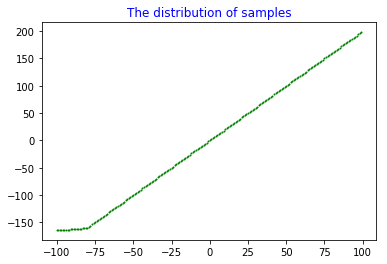

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.scatter(x,y,c='g',marker='o', s=1)
ax.set_title('The distribution of samples',fontsize=12,color='b')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
# split training set and test set

#x_train, y_test, y_train, y_test = train_test_split(x, y)
x_train = x[0:int(x.shape[0] * 0.7)]
y_train = y[0:int(x.shape[0] * 0.7)]
x_test = x[int(x.shape[0] * 0.7):]
y_test = y[int(x.shape[0] * 0.7):]

In [35]:
def training(clf, x, y, poly):
    x_reshape = x.reshape(-1,1)
    poly.fit(x_reshape)
    xn = poly.transform(x_reshape)
    clf.fit(xn, y)
    print("The coefficients of linear regression model: ", clf.coef_)
    y_predict = clf.predict(xn)
    fig,ax = plt.subplots(1,1)
    ax.scatter(x, y, c='g',marker='o', s=1)
    ax.plot(x, y_predict, 'r')
    #ax.plot(x,y,'g',x, y_predict, 'r')
    ax.set_title('Training Set and Fitting Result of Linear Regression Model',fontsize=12,color='r')
    plt.show()

In [36]:
poly = PolynomialFeatures(degree=2)

The coefficients of linear regression model:  [0.         2.07751784 0.00292591]


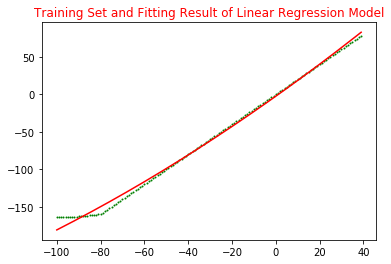

In [37]:
clf = LinearRegression()
training(clf, x_train, y_train, poly)

In [40]:
# create a function for testing
def testing(clf, x, y, poly):
    x_reshape= x.reshape(-1, 1)
    poly.fit(x_reshape)
    xn = poly.transform(x_reshape)
    y_predict = clf.predict(xn)
    print("The R square of this model is: ", clf.score(xn, y))
    fig,ax = plt.subplots(1,1)
    ax.scatter(x, y, c='g',marker='o', s=1)
    ax.plot(x, y_predict, 'r')
    ax.set_title('Apply the linear model on the test set',fontsize=12,color='b')
    plt.show()

The R square of this model is:  0.6747822390179745


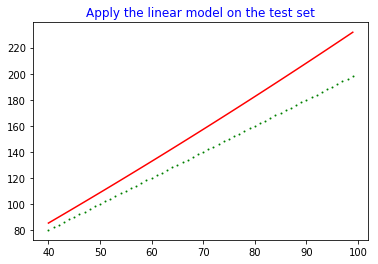

In [41]:
testing(clf, x_test, y_test, poly)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso

def search_regularization_alpha(norm, x, y, poly):
    if norm == 'l1':
        reg = Lasso()
    elif norm == 'l2':
        reg = Ridge()
    parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 50]}
    x_reshape = x.reshape(-1, 1)
    xn = poly.transform(x_reshape)
    regressor = GridSearchCV(reg, parameters, scoring='neg_mean_squared_error', cv=5)
    regressor.fit(xn, y)
    print(regressor.best_params_)
    print(regressor.best_score_)

In [43]:
search_regularization_alpha('l1', x_train, y_train, poly)

{'alpha': 20}
-89.86623996891714


C:\Users\yying\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\yying\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\yying\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\yying\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

The coefficients of linear regression model:  [0.         2.02935143 0.00233905]


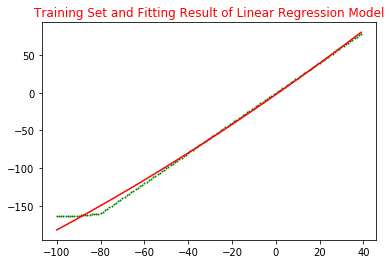

In [44]:
clf_reg = Lasso(alpha=20)
training(clf_reg, x_train, y_train, poly)

The R square of this model is:  0.857179820850184


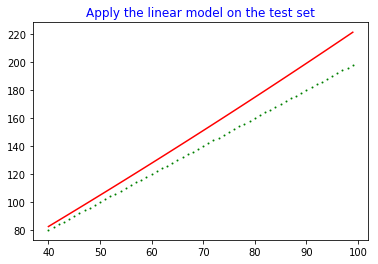

In [45]:
testing(clf_reg, x_test, y_test, poly)